### Exercise 3

Suppose a pharmaceutical company is conducting clinical trials for a new drug. Each patient has an independent probability $p=0.02$ of exhibiting adverse side effects. The company administers the drug to $n$ patients, where $n$ is a specific number.

Plot the bounds provided by Chebyshev's and Hoeffding's inequalities, as well as the actual probability that at least $50$ out of $n$ patients will exhibit side effects. The plot should be a function of the number $n$ of patients tested. If any of the bounds exceed $1$, set them equal to $1$. 

---
**Chebyshev's inequality:** With the same derivation as in Exercise 2b of Sheet 2, we obtain the inequality

$$
P(x \geq t) \leq \frac{np(1-p)}{(t - np)^2}.
$$

**Hoeffding's inequality:** Exercise 1 provides the inequality
$$
\begin{align*}
P(x \geq t) &\leq 2\exp\left(-2n\left(\frac{t}{n}-p\right)^2\right).
\end{align*}
$$

**Program:**

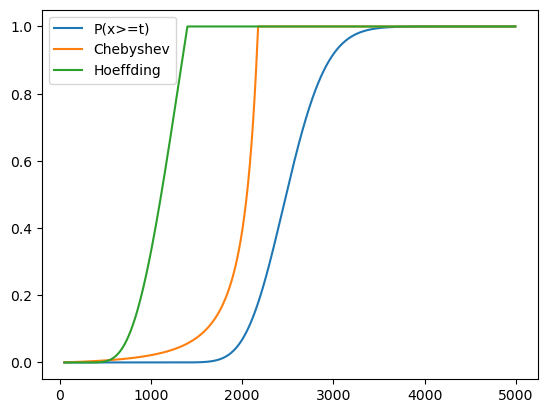

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

p = 0.02
t = 50
num = np.arange(t, 5000, 5)
labels = ['P(x>=t)', 'Chebyshev', 'Hoeffding']
eps = 1e-7

# actual prob and two bounds 
val = np.zeros((3, len(num)))

# val[0,:] : actual probability
k = np.arange(t, np.max(num)+1)
n = num[:, None]
val[0, :] = np.sum(binom.pmf(k, n, p), axis=1)

# val[1,:] : Chebyshev's bound
E = num * p
V = E * (1-p)
val[1, :] = np.where(E <= t, np.clip(V/((t-E+eps)**2), 0, 1), 1)


# val[2,:] : Hoeffding's bound
val[2, :] = np.where(p <= t/num, np.clip(2 * np.exp(-2*num*(t/num - p)**2), 0, 1), 1)

for i, l in enumerate(labels):
    plt.plot(num, val[i], label=l)
plt.legend()
plt.show()